In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import os

In [2]:
## load scanndata
scAannda = sc.read_h5ad("/home/lyx/project/scRankv2/bulk2sc/SKCM/tempfiles/scAnndata.h5ad")
savePath = "./tempfiles/"

In [3]:
sc.pp.highly_variable_genes(scAannda, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.tl.pca(scAannda, svd_solver='arpack')
sc.pp.neighbors(scAannda, n_neighbors=10, n_pcs=40)

/mnt/data/lyx/miniconda3/envs/scimap/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
scAannda

AnnData object with n_obs × n_vars = 5928 × 55737
    obs: 'Reject', 'Rank_Score', 'Rank_Label'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors'
    obsm: 'Rank_Embedding', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [5]:
sc.tl.umap(scAannda)

In [6]:
sc.tl.leiden(scAannda)

In [7]:
scAannda

AnnData object with n_obs × n_vars = 5928 × 55737
    obs: 'Reject', 'Rank_Score', 'Rank_Label', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'Rank_Embedding', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/mnt/data/lyx/miniconda3/envs/scimap/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/data/lyx/miniconda3/envs/scimap/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


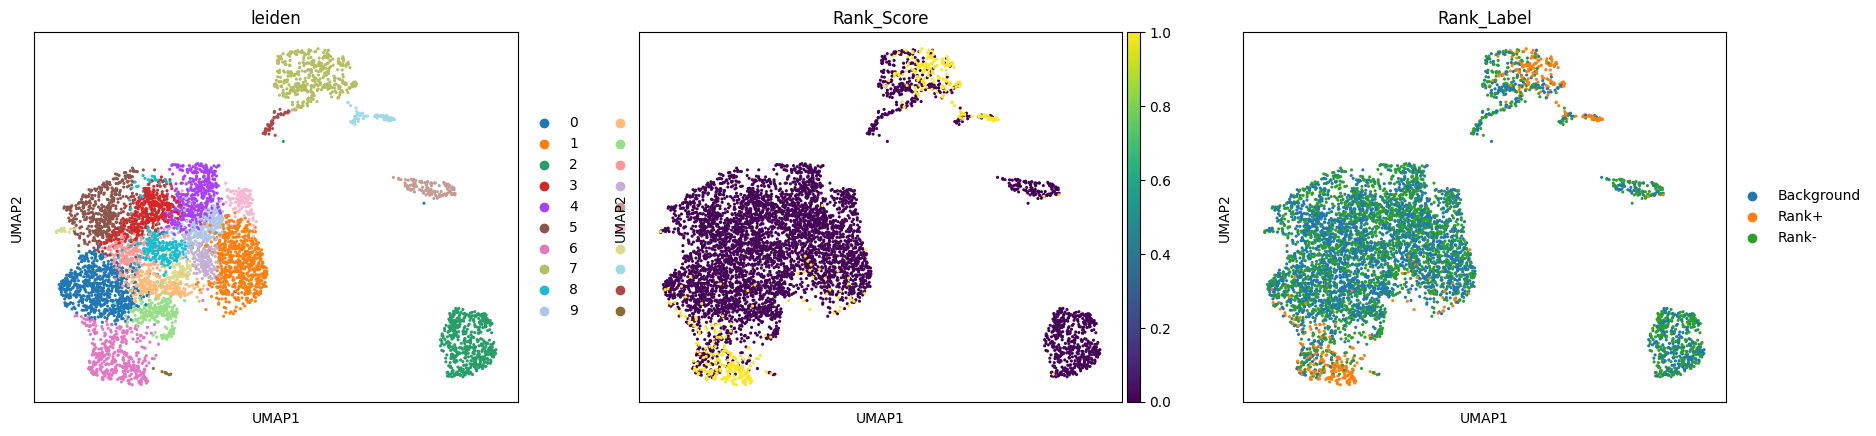

In [8]:
sc.pl.umap(scAannda, color=['leiden', 'Rank_Score', 'Rank_Label'])

/mnt/data/lyx/miniconda3/envs/scimap/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/data/lyx/miniconda3/envs/scimap/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


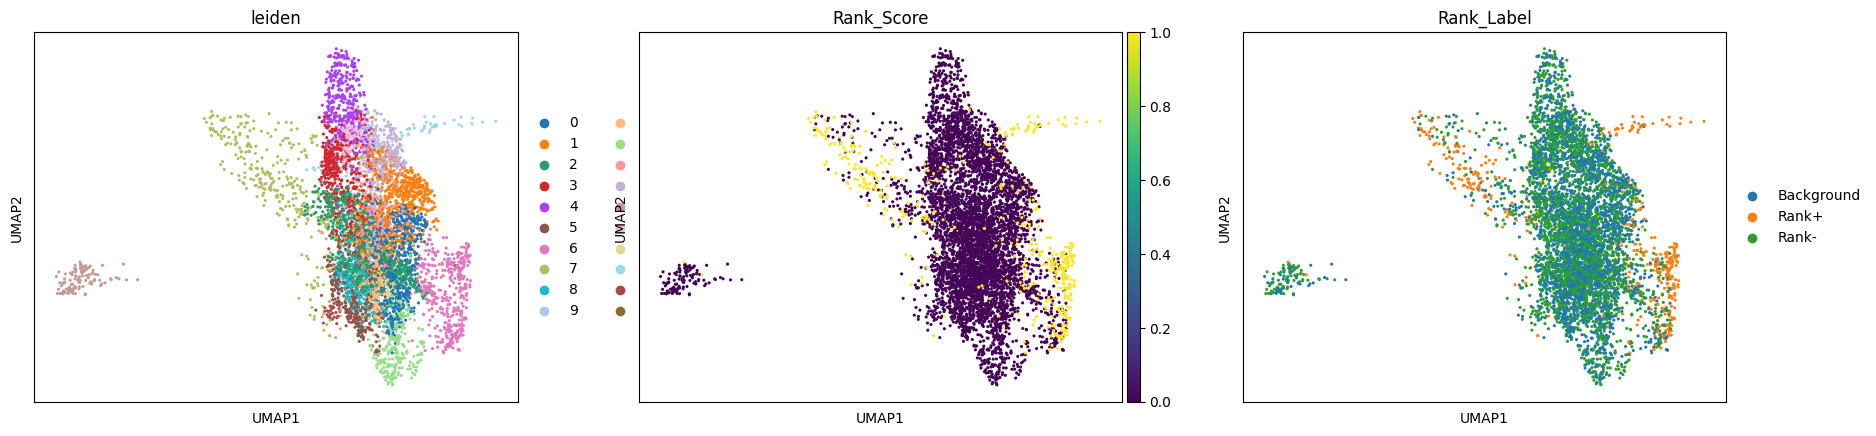

In [9]:
sc.tl.umap(scAannda, init_pos='Rank_Embedding')
sc.tl.leiden(scAannda)
sc.pl.umap(scAannda, color=['leiden', 'Rank_Score', 'Rank_Label'])

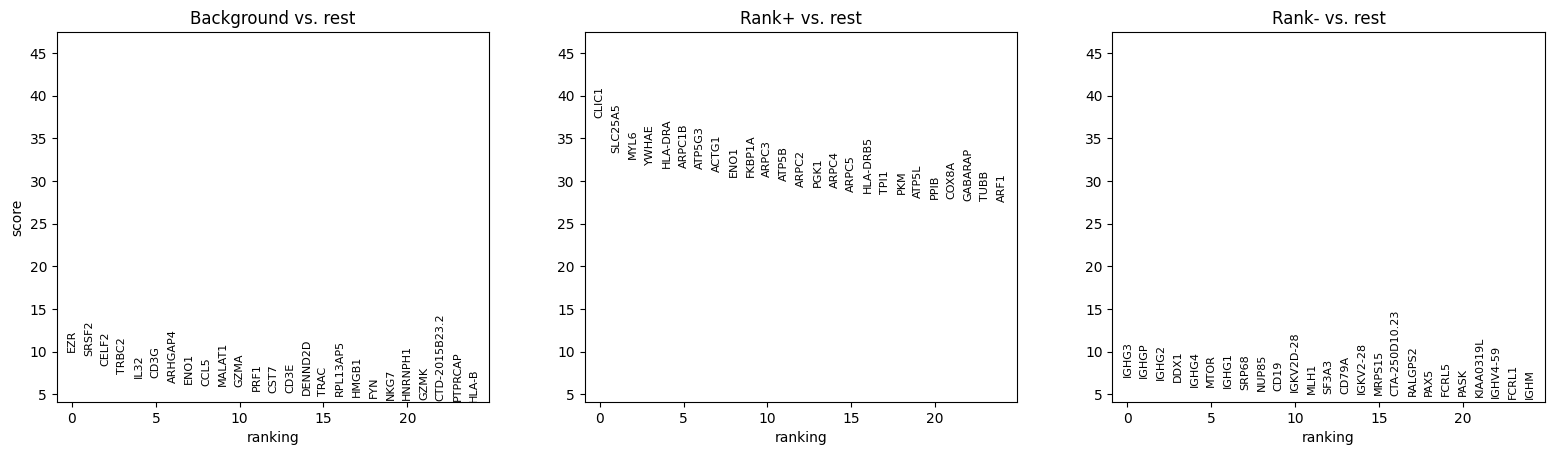

In [10]:
sc.tl.rank_genes_groups(scAannda, 'Rank_Label', method='t-test')
sc.pl.rank_genes_groups(scAannda, n_genes=25, sharey=True)

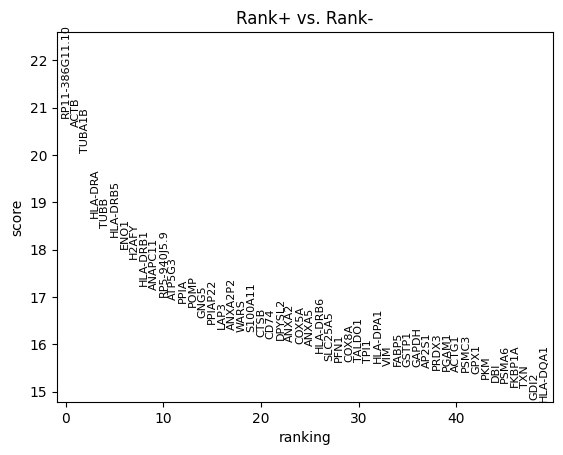

In [11]:
sc.tl.rank_genes_groups(scAannda, 'Rank_Label', groups=['Rank+'], reference='Rank-', method='wilcoxon')
sc.pl.rank_genes_groups(scAannda, groups=['Rank+'], n_genes=50)

In [12]:
# Get the DEGs information
result = scAannda.uns['rank_genes_groups']
groups = result['names'].dtype.names

# Initialize a list to store the dataframes for each group
dfs = []

for group in groups:
    # Extract data for each group
    names = result['names'][group]
    pvals = result['pvals'][group]
    pvals_adj = result['pvals_adj'][group]
    logfoldchanges = result['logfoldchanges'][group]

    # Create a DataFrame
    df = pd.DataFrame({
        'gene': names,
        'pval': pvals,
        'pval_adj': pvals_adj,
        'logfoldchange': logfoldchanges
    })

    # Filter out genes that are not significant if necessary
    # df = df[df['pval_adj'] < 0.05]

    # Assign a column with the group name
    df['group'] = group

    # Store the DataFrame in the list
    dfs.append(df)

# Combine all the DataFrames into a single one
result_df = pd.concat(dfs, ignore_index=True)

# Show the combined DataFrame
print(result_df)

                 gene           pval       pval_adj  logfoldchange  group
0      RP11-386G11.10   4.658604e-96   1.298283e-91       2.066125  Rank+
1                ACTB   2.900024e-94   5.387955e-90       0.186046  Rank+
2              TUBA1B   1.867259e-89   2.601886e-85       1.869744  Rank+
3             HLA-DRA   8.940169e-78   9.965964e-74       2.166558  Rank+
4                TUBB   3.447909e-76   3.202935e-72       2.283040  Rank+
...               ...            ...            ...            ...    ...
55732           RPS27   5.968041e-28   9.113444e-26      -0.050642  Rank+
55733           RPL13   9.058525e-30   1.717330e-27      -0.021143  Rank+
55734           TXNIP   2.060665e-31   4.504129e-29      -0.818188  Rank+
55735          RPL13A   2.354970e-38   1.067146e-35      -0.039005  Rank+
55736          MALAT1  9.624925e-112  5.364645e-107      -0.155495  Rank+

[55737 rows x 5 columns]


In [13]:
result_df.to_csv(os.path.join(savePath,'differential_expression_results.csv'), index=False)